In [2]:
import sys
sys.path.append("/Users/PredatoryMink/Statistics")

import numpy as np
import pandas as pd
import math as mt
import scipy.stats as st
import scipy.optimize as opt
import scipy.special as sp
import scipy.optimize as opt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from collections import namedtuple
from tqdm import tqdm
from mystats.utils import plot

### Задание 1

In [6]:
chain = np.array([[0, 1/4, 3/4],
              [2/3, 0, 1/3],
              [3/5, 2/5, 0]])
q = [4, 3, 5]
n = chain.shape[0]

In [8]:
STEPS = 10_000
trip = np.zeros(STEPS, dtype=int)
for i in range(STEPS - 1):
    trip[i + 1] = np.random.choice(n, p=chain[trip[i]])

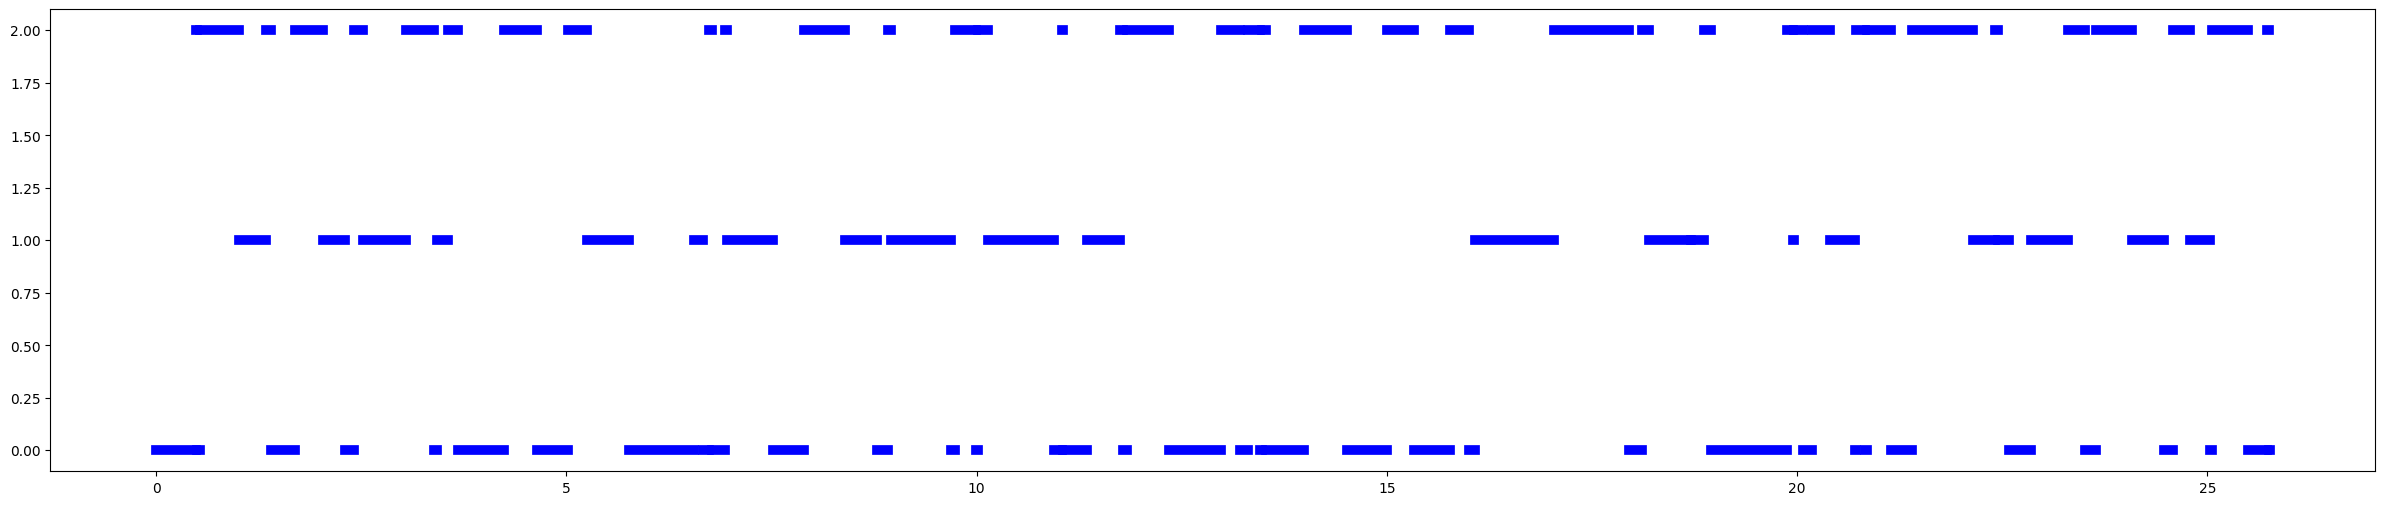

In [9]:
STEPS_PLOT = 100
plt.figure(figsize=(30, 6))

prev = 0
for i in range(STEPS_PLOT - 1):
    tau = st.expon(scale=1/q[trip[i]]).rvs()
    plt.plot([prev, prev + tau],
             [trip[i], trip[i]],
             c='b', lw=7)
    prev += tau

### Задание 2

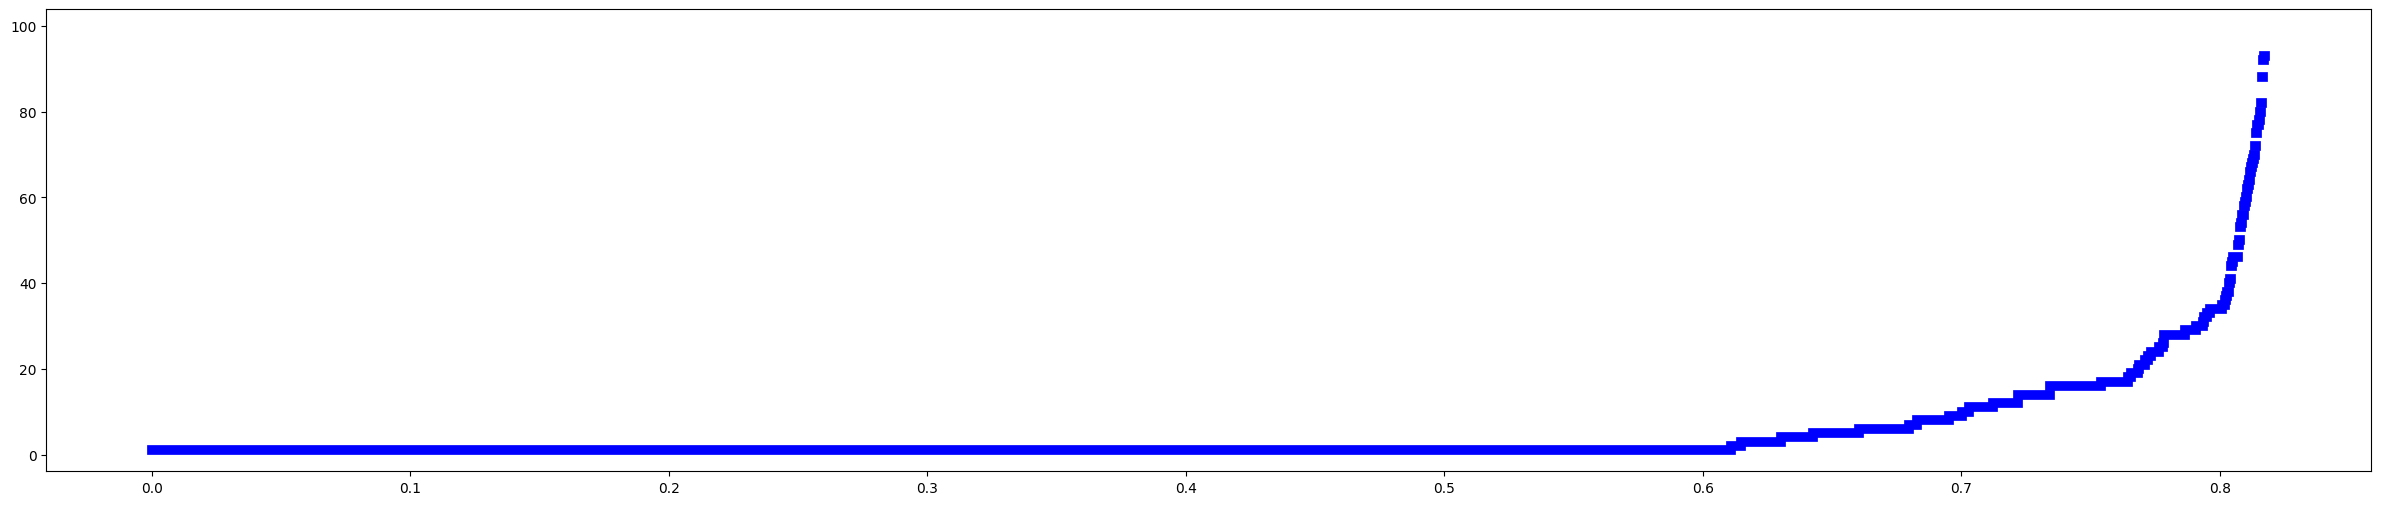

In [14]:
STEPS_PLOT = 100
plt.figure(figsize=(30, 6))

prev = 0
for i in range(1, STEPS_PLOT):
    tau = st.expon(scale=1/(i*i)).rvs()
    plt.plot([prev, prev + tau],
             [i, i],
             c='b', lw=7)
    prev += tau

### Задание 3

In [35]:
def plot_barbershop(a, b, k=3, STEPS=100):
    trip = np.zeros(STEPS, dtype=int)
    for i in range(STEPS - 1):
        cur = trip[i]
        plus = a / (a + min(k, cur) * b) if cur else 1
        minus = 1 - plus
        trip[i + 1] = cur + np.random.choice([-1, 1], p=[minus, plus])

    prev = 0
    for i in range(STEPS_PLOT - 1):
        cur = trip[i]
        q = (a + min(k, cur) * b)
        tau = st.expon(scale=1/q).rvs()
        plt.plot([prev, prev + tau],
                 [trip[i], trip[i]],
                 c='b', lw=3)
        prev += tau

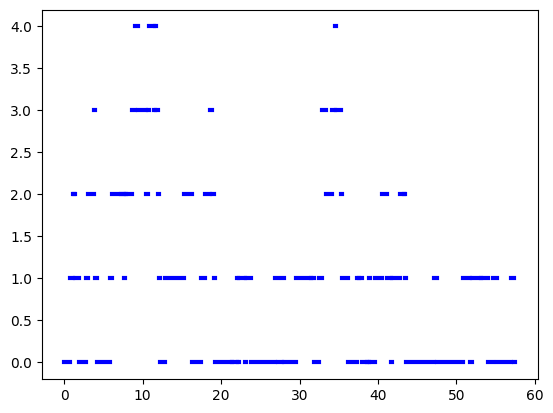

In [36]:
plot_barbershop(1, 1)

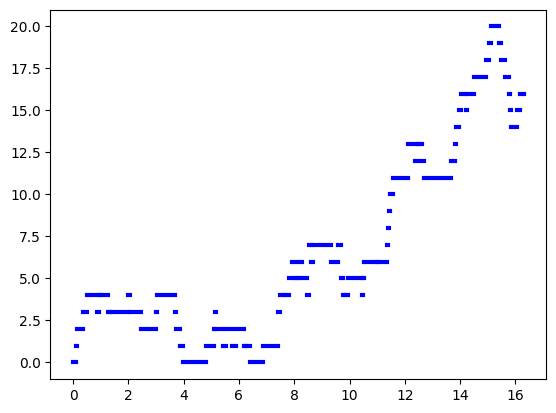

In [39]:
plot_barbershop(4, 1)

### Задание 4

In [67]:
def stationary_distribution(chain, discrete=True):
    eigenvals, eigenvects = np.linalg.eig(chain.T)
    close_idx = np.isclose(eigenvals, (1 if discrete else 0))
    stat_vect = eigenvects[:, close_idx][:, 0]
    stat_distr = stat_vect / stat_vect.sum()
    return stat_distr

In [68]:
Q = np.array([[-5, 1, 3, 1],
              [1, -3, 1, 1],
              [3, 1, -5, 1],
              [1, 1, 1, -3]], dtype=float)

n = Q.shape[0]

P = Q.copy()
for i in range(n):
    P[i] /= -P[i][i]
    P[i][i] = 0

In [69]:
stationary_distribution(P)

array([0.3125, 0.1875, 0.3125, 0.1875])

In [70]:
stationary_distribution(Q, discrete=False)

array([0.25, 0.25, 0.25, 0.25])

### Задание 5

In [92]:
with open('nerve.txt', 'r') as file:
    data = file.read()
    steps = np.array(list(map(float, data.split())))
process = steps.cumsum()

In [93]:
S = 1000
t = st.uniform(0, process[-1] - 1e-5).rvs(S)
excess = np.zeros(S)
for i in range(S):
    ind = np.searchsorted(process, t[i], side='right')
    excess[i] = process[ind] - t[i]

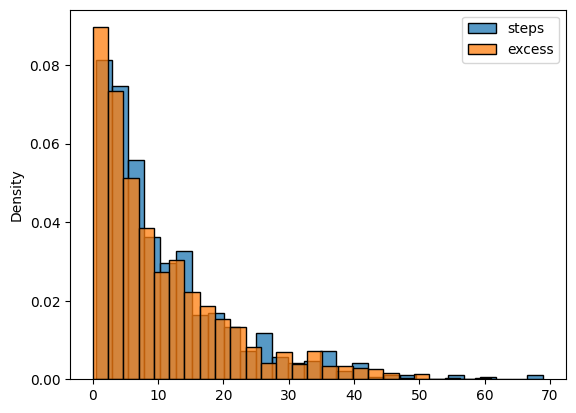

In [94]:
sns.histplot(steps, stat='density', label="steps")
sns.histplot(excess, stat='density', label="excess")
plt.legend();

In [95]:
st.mannwhitneyu(steps, excess)

MannwhitneyuResult(statistic=417280.0, pvalue=0.10435231259377871)